In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carga de supatlantique
PATH = '/Users/julietaumpierrez/Desktop/iccv-doc-workshop/supatlantique'
from photoholmes.datasets.supatlantique import SupatlantiqueDataset

dataset = SupatlantiqueDataset(
    dataset_path=PATH,
    load=["image", "dct_coefficients"],
    tampered_only=True
)
print("Total images: ", len(dataset))

WARNING - Not all images are in JPEG format. When needed, an approximation will be loaded by compressing the image in quality 100.


Total images:  34


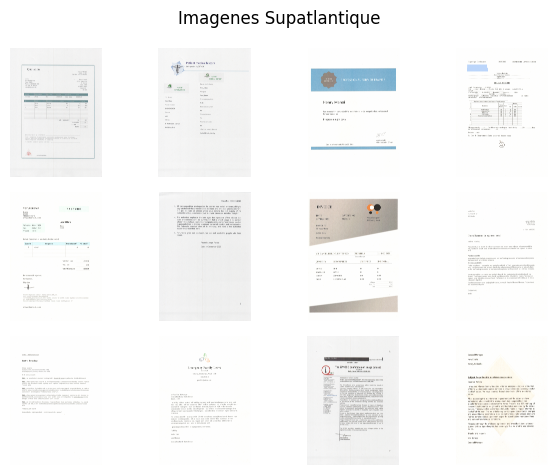

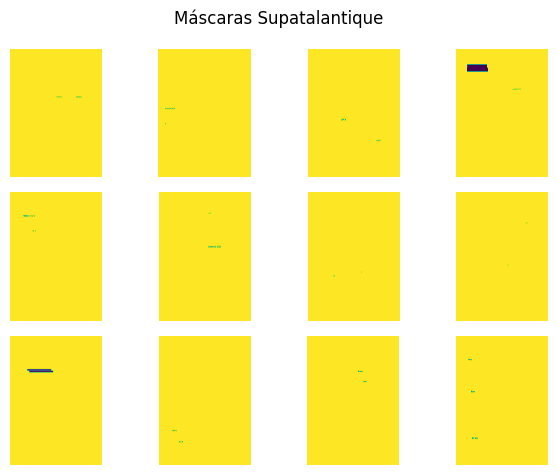

In [3]:
from photoholmes.utils.image import plot_multiple
ims = []
mks = []
idxs = list(range(0, 6)) + list(range(len(dataset) - 6, len(dataset)))
for n in idxs:
    x, mk, _ = dataset[n]
    ims.append(x["image"])
    mks.append(mk)

plot_multiple(ims, title="Imagenes Supatlantique")
plot_multiple(mks, title="Máscaras Supatalantique")

In [4]:
# Metricas desde photoholmes y con la mascara. Claramente aca vamos a tener que ver como evaluar pero asi podemos usar 
# el benchmark para generar los outputs.
from photoholmes.metrics.factory import MetricFactory

metrics = MetricFactory.load(["precision", "f1", "tpr", "accuracy"])

/Users/julietaumpierrez/Desktop/PhotoHolmesRepo/photoholmes/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/julietaumpierrez/Desktop/PhotoHolmesRepo/photoholmes/.venv/lib/python3.10/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [5]:
# Benchmark
from photoholmes.benchmark import Benchmark

benchmark = Benchmark(
    save_method_outputs=True,
    save_extra_outputs=False,
    save_metrics=True,
    output_folder="supatlantique_benchmark",
    device="cpu",
    use_existing_output=True,
    verbose=1,
)

In [8]:
# DQ 
from photoholmes.methods.dq import DQ, dq_preprocessing
dq = DQ()
dataset = SupatlantiqueDataset(
    dataset_path=PATH,
    load=["image", "dct_coefficients"],
    preprocessing_pipeline= dq_preprocessing,
)
dq_results = benchmark.run(
    method=dq,
    dataset=dataset,
    metrics=metrics,
)
print(dq_results)

WARNING - Not all images are in JPEG format. When needed, an approximation will be loaded by compressing the image in quality 100.
INFO - Using device: cpu
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Running the benchmark
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Benchmark configuration:
INFO -     Method: DQ
INFO -     Dataset: SupatlantiqueDataset
INFO -     Metrics:
INFO -        - BinaryPrecision
INFO -        - BinaryF1Score
INFO -        - BinaryRecall
INFO -        - BinaryAccuracy
INFO -     Output path: supatlantique_benchmark/dq/supatlantiquedataset
INFO -     Save method outputs: True
INFO -     Save metrics: True
INFO -     Device: cpu
INFO -     Load existing outputs: True
INFO -     Verbosity: INF

{'heatmap': {'heatmapBinaryPrecision': tensor(0.), 'heatmapBinaryF1Score': tensor(0.), 'heatmapBinaryRecall': tensor(0.), 'heatmapBinaryAccuracy': tensor(0.5008)}}


In [17]:
# Noisesniffer
from photoholmes.methods.noisesniffer import Noisesniffer, noisesniffer_preprocessing
noisesniffer = Noisesniffer()
dataset = SupatlantiqueDataset(
    dataset_path=PATH,
    load=["image"],
    preprocessing_pipeline= noisesniffer_preprocessing,
)
noisesniffer_results = benchmark.run(
    method=noisesniffer,
    dataset=dataset,
    metrics=metrics,
)
print(noisesniffer_results)

INFO - Using device: cpu
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Running the benchmark
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Benchmark configuration:
INFO -     Method: Noisesniffer
INFO -     Dataset: SupatlantiqueDataset
INFO -     Metrics:
INFO -        - BinaryPrecision
INFO -        - BinaryF1Score
INFO -        - BinaryRecall
INFO -        - BinaryAccuracy
INFO -     Output path: supatlantique_benchmark/noisesniffer/supatlantiquedataset
INFO -     Save method outputs: True
INFO -     Save metrics: True
INFO -     Device: cpu
INFO -     Load existing outputs: True
INFO -     Verbosity: INFO
INFO - --------------------------------------------------------------------------------
INFO - --------------

{'heatmap': {'heatmapBinaryPrecision': tensor(0.), 'heatmapBinaryF1Score': tensor(0.), 'heatmapBinaryRecall': tensor(0.), 'heatmapBinaryAccuracy': tensor(0.)}, 'mask': {'maskBinaryPrecision': tensor(0.5080), 'maskBinaryF1Score': tensor(0.1668), 'maskBinaryRecall': tensor(0.0997), 'maskBinaryAccuracy': tensor(0.5024)}, 'detection': {'detectionBinaryPrecision': tensor(0.5686), 'detectionBinaryF1Score': tensor(0.6824), 'detectionBinaryRecall': tensor(0.8529), 'detectionBinaryAccuracy': tensor(0.6029)}}


In [22]:
# Zero
from photoholmes.methods.zero import Zero, zero_preprocessing
zero = Zero()
dataset = SupatlantiqueDataset(
    dataset_path=PATH,
    load=["image", "dct_coefficients"],
    preprocessing_pipeline= zero_preprocessing,
)
zero_results = benchmark.run(
    method=zero,
    dataset=dataset,
    metrics=metrics,
)
print(zero_results)

WARNING - The load attribute and the preprocessing pipeline inputs do not match. Using the preprocessing pipeline inputs: ['image']
INFO - Using device: cpu
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Running the benchmark
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Benchmark configuration:
INFO -     Method: Zero
INFO -     Dataset: SupatlantiqueDataset
INFO -     Metrics:
INFO -        - BinaryPrecision
INFO -        - BinaryF1Score
INFO -        - BinaryRecall
INFO -        - BinaryAccuracy
INFO -     Output path: supatlantique_benchmark/zero/supatlantiquedataset
INFO -     Save method outputs: True
INFO -     Save metrics: True
INFO -     Device: cpu
INFO -     Load existing outputs: True
INFO -     Verbosity

{'heatmap': {'heatmapBinaryPrecision': tensor(0.), 'heatmapBinaryF1Score': tensor(0.), 'heatmapBinaryRecall': tensor(0.), 'heatmapBinaryAccuracy': tensor(0.)}, 'mask': {'maskBinaryPrecision': tensor(0.), 'maskBinaryF1Score': tensor(0.), 'maskBinaryRecall': tensor(0.), 'maskBinaryAccuracy': tensor(0.5008)}, 'detection': {'detectionBinaryPrecision': tensor(0.), 'detectionBinaryF1Score': tensor(0.), 'detectionBinaryRecall': tensor(0.), 'detectionBinaryAccuracy': tensor(0.5000)}}


In [23]:
# Splicebuster
from photoholmes.methods.splicebuster import Splicebuster, splicebuster_preprocessing
splicebuster = Splicebuster()
dataset = SupatlantiqueDataset(
    dataset_path=PATH,
    load=["image", "dct_coefficients"],
    preprocessing_pipeline= splicebuster_preprocessing,
)
splicebuster_results = benchmark.run(
    method=splicebuster,
    dataset=dataset,
    metrics=metrics,
)
print(splicebuster_results)

WARNING - Splicebuster is under a research only use license. See the LICENSE inside the method folder.
WARNING - The load attribute and the preprocessing pipeline inputs do not match. Using the preprocessing pipeline inputs: ['image']
INFO - Using device: cpu
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Running the benchmark
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Benchmark configuration:
INFO -     Method: Splicebuster
INFO -     Dataset: SupatlantiqueDataset
INFO -     Metrics:
INFO -        - BinaryPrecision
INFO -        - BinaryF1Score
INFO -        - BinaryRecall
INFO -        - BinaryAccuracy
INFO -     Output path: supatlantique_benchmark/splicebuster/supatlantiquedataset
INFO -     Save method outputs

{'heatmap': {'heatmapBinaryPrecision': tensor(0.4272), 'heatmapBinaryF1Score': tensor(0.0043), 'heatmapBinaryRecall': tensor(0.0022), 'heatmapBinaryAccuracy': tensor(0.5004)}, 'mask': {'maskBinaryPrecision': tensor(0.), 'maskBinaryF1Score': tensor(0.), 'maskBinaryRecall': tensor(0.), 'maskBinaryAccuracy': tensor(0.)}, 'detection': {'detectionBinaryPrecision': tensor(0.), 'detectionBinaryF1Score': tensor(0.), 'detectionBinaryRecall': tensor(0.), 'detectionBinaryAccuracy': tensor(0.)}}


In [24]:
# Focal
from photoholmes.methods.focal import Focal, focal_preprocessing
weights = {"ViT":"/Users/julietaumpierrez/Desktop/weights/ViT_weights.pth","HRNet":"/Users/julietaumpierrez/Desktop/weights/HRNet_weights.pth"}
focal = Focal(weights)
dataset = SupatlantiqueDataset(
    dataset_path=PATH,
    load=["image", "dct_coefficients"],
    preprocessing_pipeline= focal_preprocessing,
)
focal_results = benchmark.run(
    method=focal,
    dataset=dataset,
    metrics=metrics,
)
print(focal_results)

WARNING - The load attribute and the preprocessing pipeline inputs do not match. Using the preprocessing pipeline inputs: ['image']
INFO - Using device: cpu
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Running the benchmark
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Benchmark configuration:
INFO -     Method: Focal
INFO -     Dataset: SupatlantiqueDataset
INFO -     Metrics:
INFO -        - BinaryPrecision
INFO -        - BinaryF1Score
INFO -        - BinaryRecall
INFO -        - BinaryAccuracy
INFO -     Output path: supatlantique_benchmark/focal/supatlantiquedataset
INFO -     Save method outputs: True
INFO -     Save metrics: True
INFO -     Device: cpu
INFO -     Load existing outputs: True
INFO -     Verbosi

{'heatmap': {'heatmapBinaryPrecision': tensor(0.), 'heatmapBinaryF1Score': tensor(0.), 'heatmapBinaryRecall': tensor(0.), 'heatmapBinaryAccuracy': tensor(0.)}, 'mask': {'maskBinaryPrecision': tensor(0.4973), 'maskBinaryF1Score': tensor(0.2497), 'maskBinaryRecall': tensor(0.1667), 'maskBinaryAccuracy': tensor(0.4999)}, 'detection': {'detectionBinaryPrecision': tensor(0.), 'detectionBinaryF1Score': tensor(0.), 'detectionBinaryRecall': tensor(0.), 'detectionBinaryAccuracy': tensor(0.)}}


In [8]:
# Trufor
from photoholmes.methods.trufor import TruFor, trufor_preprocessing
weights = '/Users/julietaumpierrez/Desktop/PhotoHolmesRepo/photoholmes/weights/trufor/trufor.pth.tar'
trufor = TruFor(weights = weights)
dataset = SupatlantiqueDataset(
    dataset_path=PATH,
    load=["image", "dct_coefficients"],
    preprocessing_pipeline= trufor_preprocessing,
)
trufor_results = benchmark.run(
    method=trufor,
    dataset=dataset,
    metrics=metrics,
)
print(trufor_results)

WARNING - Trufor has a custom research only licence. See the LICENSE inside the method folder or at https://github.com/grip-unina/TruFor/blob/main/test_docker/LICENSE.txt. By continuing the use, you are agreeing to the conditions on their license.
INFO - Using backbone: Segformer-B2
INFO - Using MLP Decoder
WARNING - The load attribute and the preprocessing pipeline inputs do not match. Using the preprocessing pipeline inputs: ['image']
INFO - Using device: cpu
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Running the benchmark
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Benchmark configuration:
INFO -     Method: TruFor
INFO -     Dataset: SupatlantiqueDataset
INFO -     Metrics:
INFO -        - BinaryPrecision
IN

: 

In [8]:
# catnet
from photoholmes.methods.catnet import CatNet, catnet_preprocessing
weights = '/Users/julietaumpierrez/Desktop/PhotoHolmesRepo/photoholmes/weights/catnet/weights.pth'
catnet = CatNet(weights=weights)
dataset = SupatlantiqueDataset(
    dataset_path=PATH,
    load=["image", "dct_coefficients"],
    preprocessing_pipeline=catnet_preprocessing,
)
catnet_results = benchmark.run(
    method=catnet,
    dataset=dataset,
    metrics=metrics,
)
print(catnet_results)

WARNING -  CatNet is under a license that only allows research use. You can check the license inside the method folder's or at https://github.com/mjkwon2021/CAT-Net/blob/main/README.md#licence.If you use this method, you are agreeing to the terms of the license.
WARNING - Not all images are in JPEG format. When needed, an approximation will be loaded by compressing the image in quality 100.
WARNING - The load attribute and the preprocessing pipeline inputs do not match. Using the preprocessing pipeline inputs: ['image', 'qtables', 'dct_coefficients']
INFO - Using device: cpu
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Running the benchmark
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Benchmark configuration:
INFO 

{'heatmap': {'heatmapBinaryPrecision': tensor(0.4891), 'heatmapBinaryF1Score': tensor(0.0028), 'heatmapBinaryRecall': tensor(0.0014), 'heatmapBinaryAccuracy': tensor(0.5008)}}


In [6]:
# Adaptive
from photoholmes.methods.adaptive_cfa_net import AdaptiveCFANet, adaptive_cfa_net_preprocessing
adaptive_cfa = AdaptiveCFANet(weights= '/Users/julietaumpierrez/Desktop/PhotoHolmesRepo/photoholmes/weights/adaptive_cfa_net/weights.pth')
dataset = SupatlantiqueDataset(
    dataset_path=PATH,
    load=["image", "dct_coefficients"],
    preprocessing_pipeline=adaptive_cfa_net_preprocessing,
)
adaptive_cfa_results = benchmark.run(
    method=adaptive_cfa,
    dataset=dataset,
    metrics=metrics,
)
print(adaptive_cfa_results)


WARNING - The load attribute and the preprocessing pipeline inputs do not match. Using the preprocessing pipeline inputs: ['image']
INFO - Using device: cpu
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Running the benchmark
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Benchmark configuration:
INFO -     Method: AdaptiveCFANet
INFO -     Dataset: SupatlantiqueDataset
INFO -     Metrics:
INFO -        - BinaryPrecision
INFO -        - BinaryF1Score
INFO -        - BinaryRecall
INFO -        - BinaryAccuracy
INFO -     Output path: supatlantique_benchmark/adaptivecfanet/supatlantiquedataset
INFO -     Save method outputs: True
INFO -     Save metrics: True
INFO -     Device: cpu
INFO -     Load existing outputs: True


{'heatmap': {'heatmapBinaryPrecision': tensor(0.4991), 'heatmapBinaryF1Score': tensor(0.5779), 'heatmapBinaryRecall': tensor(0.6862), 'heatmapBinaryAccuracy': tensor(0.4996)}}


In [10]:
# exif
from photoholmes.methods.exif_as_language import EXIFAsLanguage, exif_as_language_preprocessing
exif_as_language = EXIFAsLanguage(weights = '/Users/julietaumpierrez/Desktop/PhotoHolmesRepo/photoholmes/weights/exif_as_language/weights.pth')
dataset = SupatlantiqueDataset(
    dataset_path=PATH,
    load=["image"],
    preprocessing_pipeline=exif_as_language_preprocessing,
)
exif_as_language_results = benchmark.run(
    method=exif_as_language,
    dataset=dataset,
    metrics=metrics,
)
print(exif_as_language_results)

INFO - Using device: cpu
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Running the benchmark
INFO - --------------------------------------------------------------------------------
INFO - --------------------------------------------------------------------------------
INFO - Benchmark configuration:
INFO -     Method: EXIFAsLanguage
INFO -     Dataset: SupatlantiqueDataset
INFO -     Metrics:
INFO -        - BinaryPrecision
INFO -        - BinaryF1Score
INFO -        - BinaryRecall
INFO -        - BinaryAccuracy
INFO -     Output path: supatlantique_benchmark/exifaslanguage/supatlantiquedataset
INFO -     Save method outputs: True
INFO -     Save metrics: True
INFO -     Device: cpu
INFO -     Load existing outputs: True
INFO -     Verbosity: INFO
INFO - --------------------------------------------------------------------------------
INFO - ----------

{'heatmap': {'heatmapBinaryPrecision': tensor(0.5012), 'heatmapBinaryF1Score': tensor(0.0014), 'heatmapBinaryRecall': tensor(0.0007), 'heatmapBinaryAccuracy': tensor(0.5008)}, 'mask': {'maskBinaryPrecision': tensor(0.5726), 'maskBinaryF1Score': tensor(0.5193), 'maskBinaryRecall': tensor(0.4750), 'maskBinaryAccuracy': tensor(0.5610)}}
